In [7]:
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
#establish connection with database
con = lite.connect('baseball-archive-2011.sqlite')
#query the required data + (win percentage (wins/games))
teams_query = "Select yearID,teamID,name, ROUND(W * 100.0 / G, 1) as win_percent from Teams "
#convert output to pandas
teams_table = pd.read_sql(teams_query, con)
teams_table

,yearID,teamID,name,win_percent
0,1871,BS1,Boston Red Stockings,64.50
1,1871,CH1,Chicago White Stockings,67.90
2,1871,CL1,Cleveland Forest Citys,34.50
3,1871,FW1,Fort Wayne Kekiongas,36.80
4,1871,NY2,New York Mutuals,48.50
...,...,...,...,...
2680,2011,PIT,Pittsburgh Pirates,44.40
2681,2011,SDN,San Diego Padres,43.80
2682,2011,SFN,San Francisco Giants,53.10
2683,2011,SLN,St. Louis Cardinals,55.60


In [8]:
#extracted total salary for each team in every year using sql and stored using pandas
payroll_query = "Select yearID,teamID,sum(salary) from Salaries group by teamID,yearID "
payroll_table = pd.read_sql(payroll_query, con)
payroll_table

,yearID,teamID,sum(salary)
0,1959,DET,7000.00
1,1980,TOR,55000.00
2,1981,NYA,588000.00
3,1981,TOR,85000.00
4,1982,TOR,250000.00
...,...,...,...
740,2010,SLN,93540751.00
741,2010,TBA,71923471.00
742,2010,TEX,55250544.00
743,2010,TOR,62234000.00


In [9]:
#merged table #1 ,#2 in one big table using inner join on teamID and yearID
teams_merged = pd.merge(teams_table,payroll_table, on=["teamID","yearID"])

teams_merged.rename(columns={"sum(salary)":"Total Payroll"},inplace = True)
teams_merged

,yearID,teamID,name,win_percent,Total Payroll
0,1959,DET,Detroit Tigers,49.40,7000.00
1,1980,TOR,Toronto Blue Jays,41.40,55000.00
2,1981,NYA,New York Yankees,55.10,588000.00
3,1981,TOR,Toronto Blue Jays,34.90,85000.00
4,1982,TOR,Toronto Blue Jays,48.10,250000.00
...,...,...,...,...,...
740,2010,PIT,Pittsburgh Pirates,35.20,34943000.00
741,2010,SDN,San Diego Padres,55.60,37799300.00
742,2010,SFN,San Francisco Giants,56.80,98641333.00
743,2010,SLN,St. Louis Cardinals,53.10,93540751.00


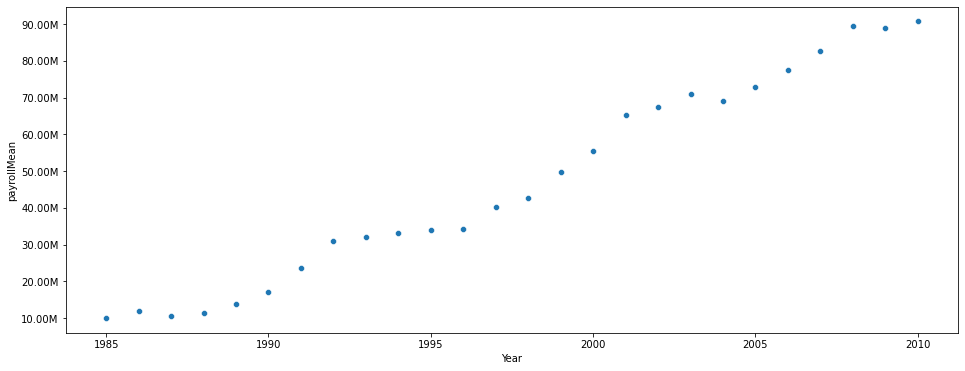

In [10]:
#extracted new table containing average payroll using mean for all teams in each year
payroll_data = []
for i in range (1985,2012):
    x = teams_merged.copy().loc[teams_merged['yearID'] == i]
    payroll_data.append([i,x['Total Payroll'].mean()])

payrollMean = pd.DataFrame(payroll_data, columns = ['Year', 'payrollMean'])
payrollMean.dropna(inplace=True)
#scatter plotted the data to analyze it
plt.figure(figsize=(16, 6))
period_scatterplot =sns.scatterplot(data=payrollMean,x="Year",y="payrollMean") 

period_scatterplot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))


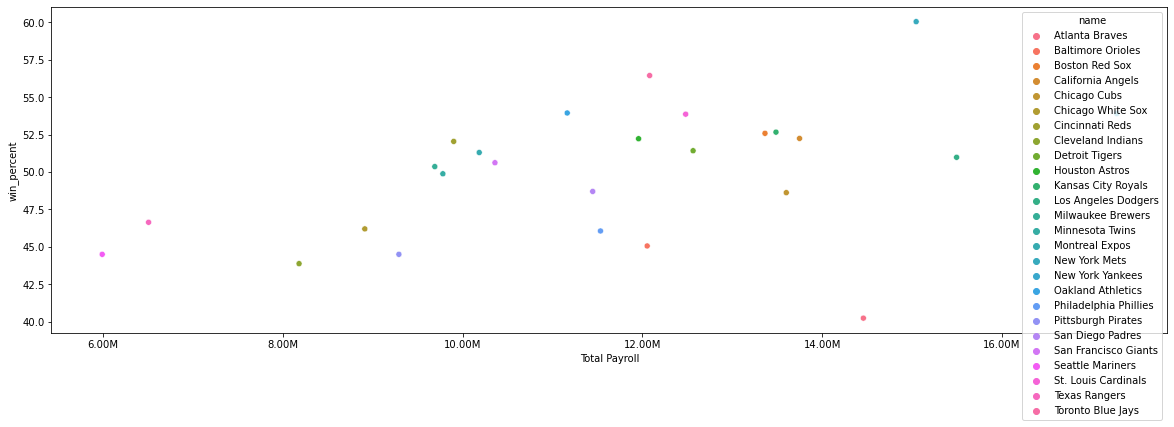

In [11]:
#extracted a table containing the mean win percentage and the mean total payroll for every team in each time period
teams_from_1985_1990 = teams_merged.copy().loc[(teams_merged['yearID'] >= 1985) & (teams_merged['yearID'] < 1990)]
teams_from_1985_1990 = teams_from_1985_1990.groupby('name').mean()
teams_from_1985_1990.drop(columns=['yearID'],inplace=True)
teams_from_1985_1990

#Scatter Plot
plt.figure(figsize=(20, 6))

scatterplot_1985_1990 =sns.scatterplot(data=teams_from_1985_1990,x="Total Payroll",y="win_percent",hue = "name") 
scatterplot_1985_1990.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))


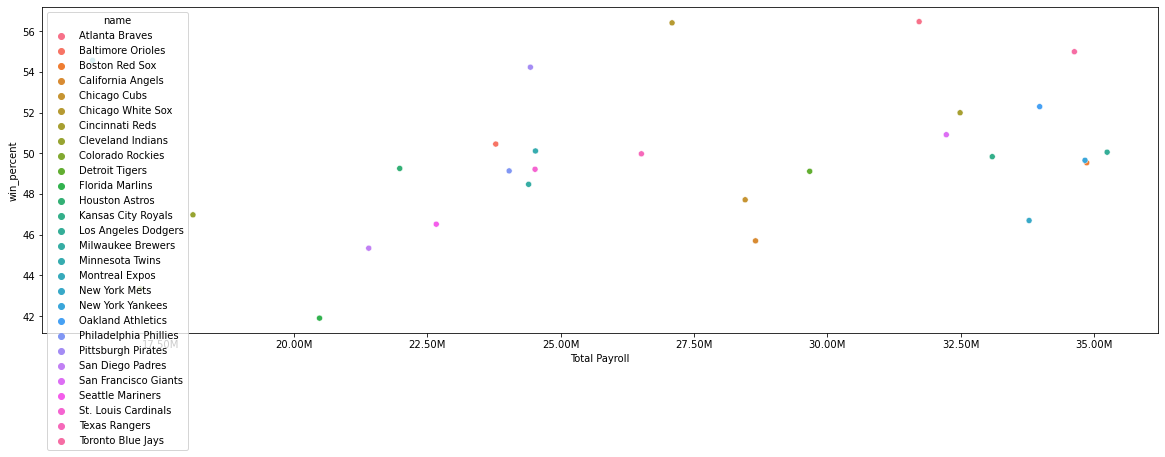

In [12]:
#extracted a table containing the mean win percentage and the mean total payroll for every team in each time period
teams_from_1990_1995 = teams_merged.copy().loc[(teams_merged['yearID'] >= 1990) & (teams_merged['yearID'] < 1995)]
teams_from_1990_1995 = teams_from_1990_1995.groupby('name').mean()
teams_from_1990_1995.drop(columns=['yearID'],inplace=True)
teams_from_1990_1995

#Scatter Plot
plt.figure(figsize=(20, 6))
scatterplot_1990_1995 =sns.scatterplot(data=teams_from_1990_1995,x="Total Payroll",y="win_percent",hue = "name") 
scatterplot_1990_1995.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))


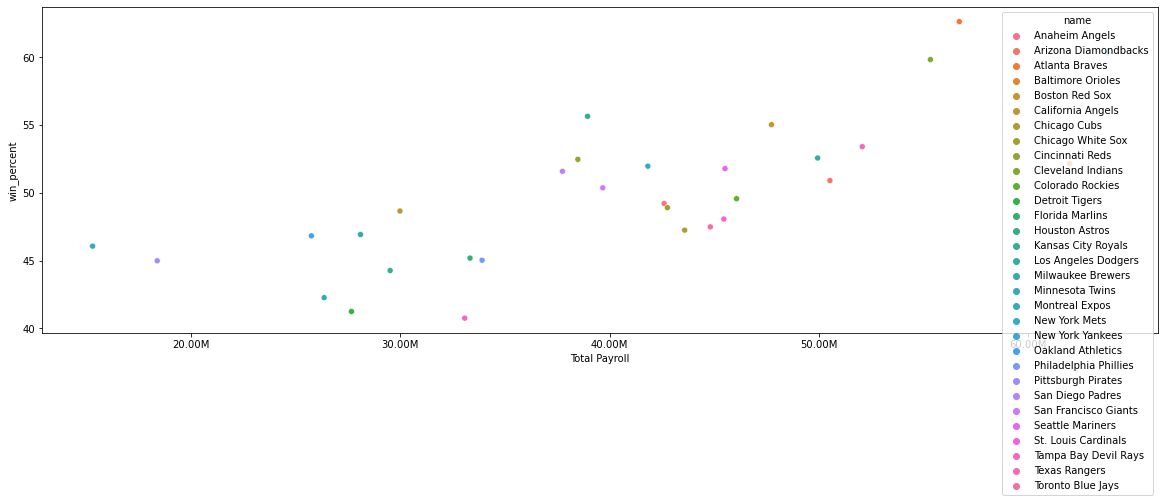

In [13]:
#extracted a table containing the mean win percentage and the mean total payroll for every team in each time period
teams_from_1995_2000 = teams_merged.copy().loc[(teams_merged['yearID'] >= 1995) & (teams_merged['yearID'] < 2000)]
teams_from_1995_2000 = teams_from_1995_2000.groupby('name').mean()
teams_from_1995_2000.drop(columns=['yearID'],inplace=True)
teams_from_1995_2000

#Scatter Plot
plt.figure(figsize=(20, 6))
scatterplot_1995_2000 =sns.scatterplot(data=teams_from_1995_2000,x="Total Payroll",y="win_percent",hue = "name") 
scatterplot_1995_2000.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))


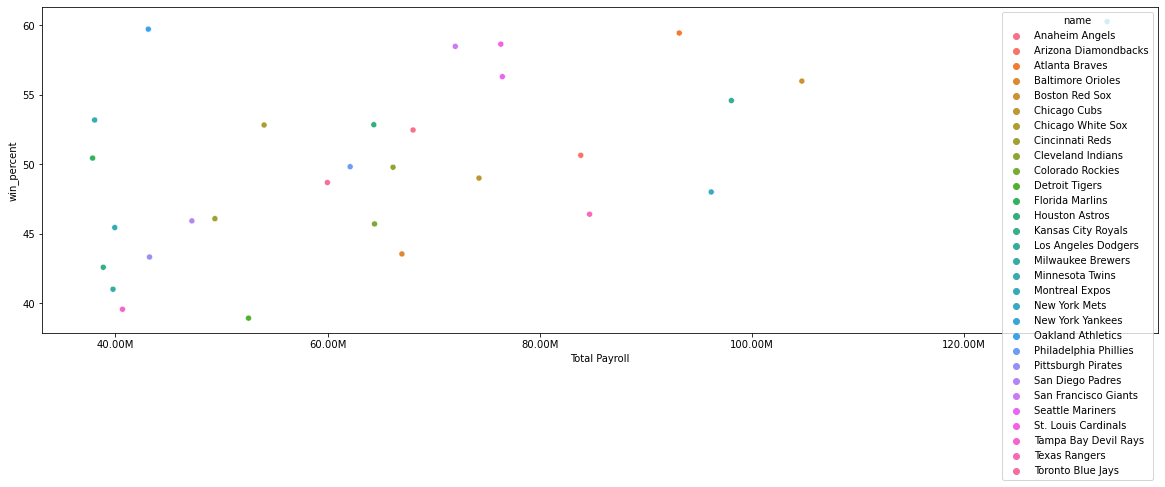

In [14]:
#extracted a table containing the mean win percentage and the mean total payroll for every team in each time period
teams_from_2000_2005 = teams_merged.copy().loc[(teams_merged['yearID'] >= 2000) & (teams_merged['yearID'] < 2005)]
teams_from_2000_2005 = teams_from_2000_2005.groupby('name').mean()
teams_from_2000_2005.drop(columns=['yearID'],inplace=True)
teams_from_2000_2005

#Scatter Plot
plt.figure(figsize=(20, 6))
scatterplot_2000_2005 =sns.scatterplot(data=teams_from_2000_2005,x="Total Payroll",y="win_percent",hue = "name") 
scatterplot_2000_2005.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))


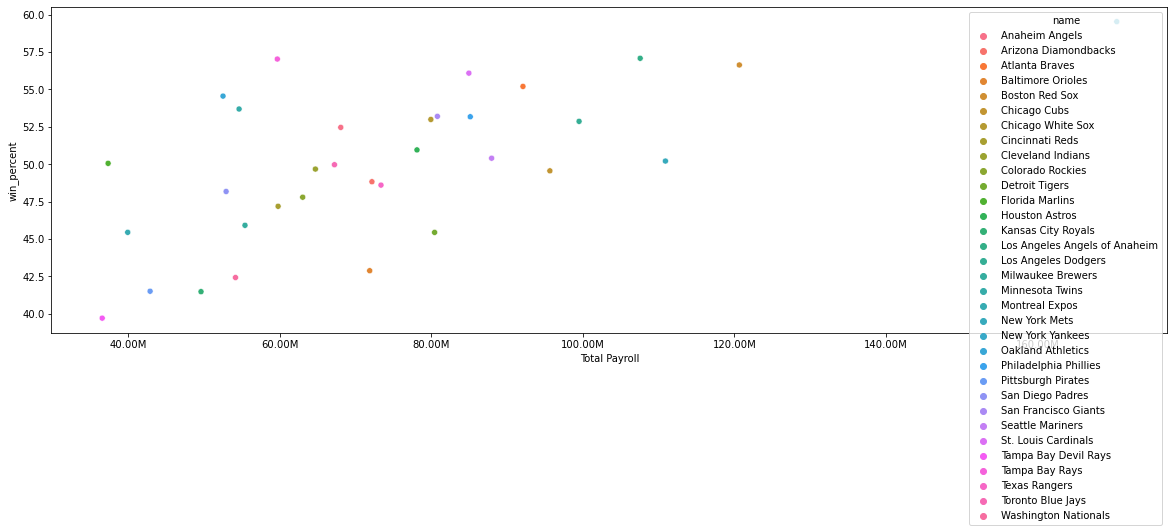

In [15]:
#extracted a table containing the mean win percentage and the mean total payroll for every team in each time period
teams_from_2005_2011 = teams_merged.copy().loc[(teams_merged['yearID'] >= 2000) & (teams_merged['yearID'] < 2011)]
teams_from_2005_2011 = teams_from_2005_2011.groupby('name').mean()
teams_from_2005_2011.drop(columns=['yearID'],inplace=True)
teams_from_2005_2011

#Scatter Plot
plt.figure(figsize=(20, 6))
scatterplot_2005_2011 =sns.scatterplot(data=teams_from_2005_2011,x="Total Payroll",y="win_percent",hue = "name") 
scatterplot_2005_2011.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))


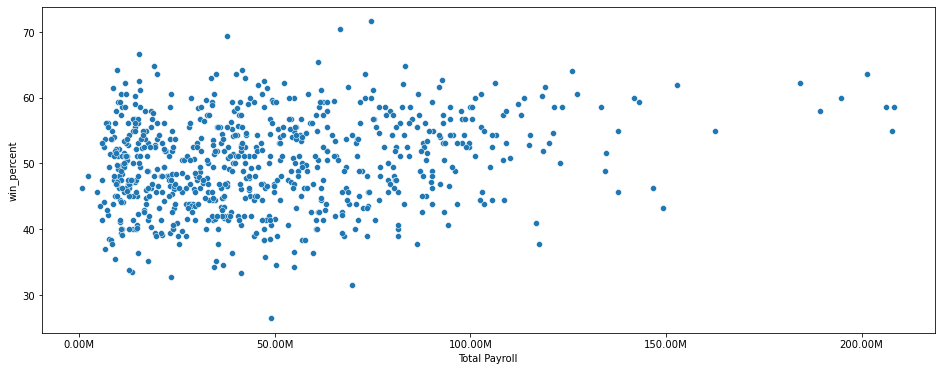

In [16]:
#calculated the standard deviation for every year
payroll_data_std = []
for i in range (1985,2012):
    x = teams_merged.copy().loc[teams_merged['yearID'] == i]
    payroll_data_std.append([i,x['Total Payroll'].std()])

payrollSTD = pd.DataFrame(payroll_data_std, columns = ['Year', 'payrollSTD'])
#got rid of null/0/na values as they can skew result
payrollSTD.dropna(inplace=True)

#merging tables to operate on them
teams_merged_std = pd.merge(teams_merged,payrollMean,left_on="yearID",right_on="Year")
teams_merged_std = pd.merge(teams_merged_std,payrollSTD,left_on="yearID",right_on="Year")
teams_merged_std.drop(columns=["Year_x","Year_y"],inplace=True)


#caclulating standardized payroll for every team in every year
teams_merged_std["payroll_standardized"]= (teams_merged_std["Total Payroll"]-teams_merged_std["payrollMean"])/teams_merged_std["payrollSTD"]

#plotting the data before standardization
plt.figure(figsize=(16, 6))
period_scatterplot =sns.scatterplot(data=teams_merged_std,x="Total Payroll",y="win_percent") 
period_scatterplot.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

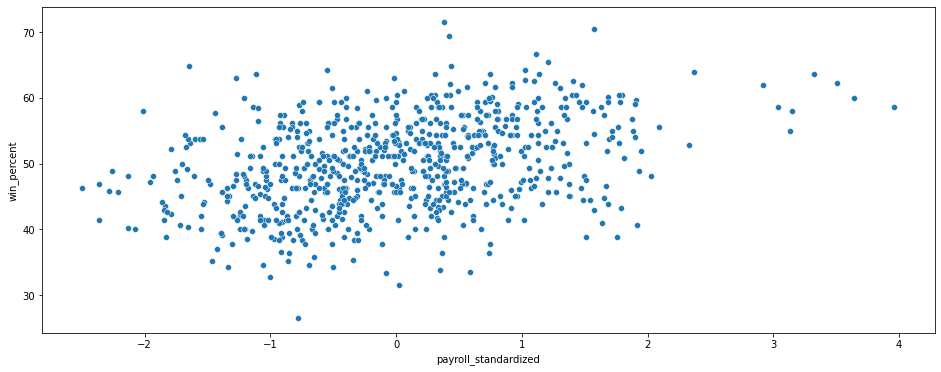

In [17]:
#plotting the data after standardization
plt.figure(figsize=(16, 6))
period_scatterplot =sns.scatterplot(data=teams_merged_std,x="payroll_standardized",y="win_percent")

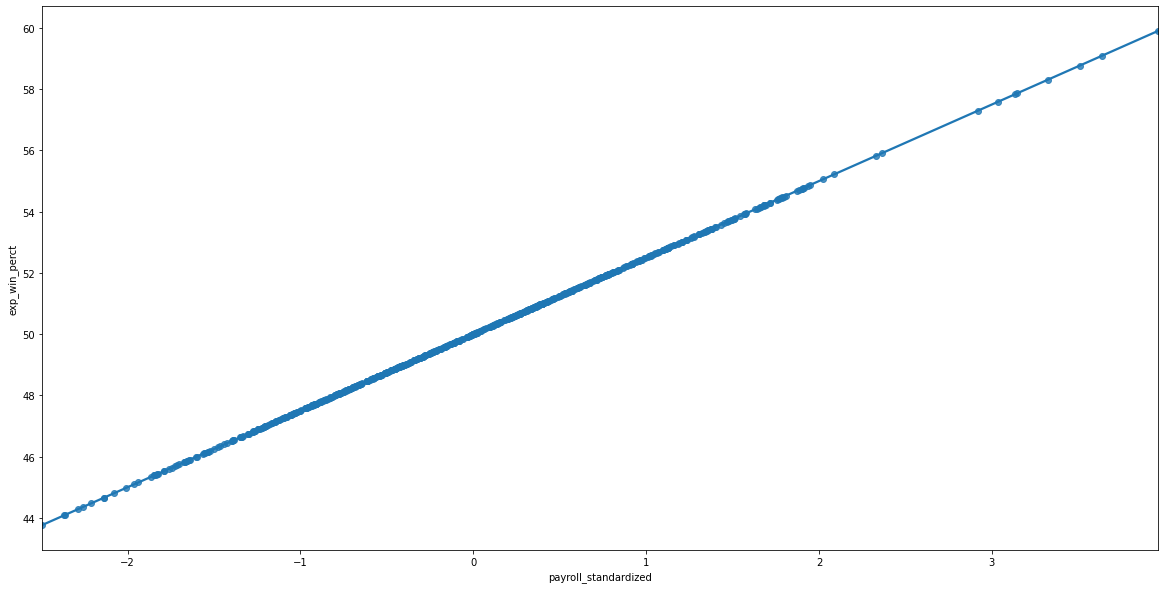

In [18]:
#Calculating expected win percent for every team in every year
teams_merged_std["exp_win_perct"]= 50+(2.5*teams_merged_std["payroll_standardized"])

#plotting the data of expected wins against std payroll
teams_merged_std
plt.figure(figsize=(20, 10))
period_regplot =sns.regplot(data=teams_merged_std,x="payroll_standardized",y="exp_win_perct")

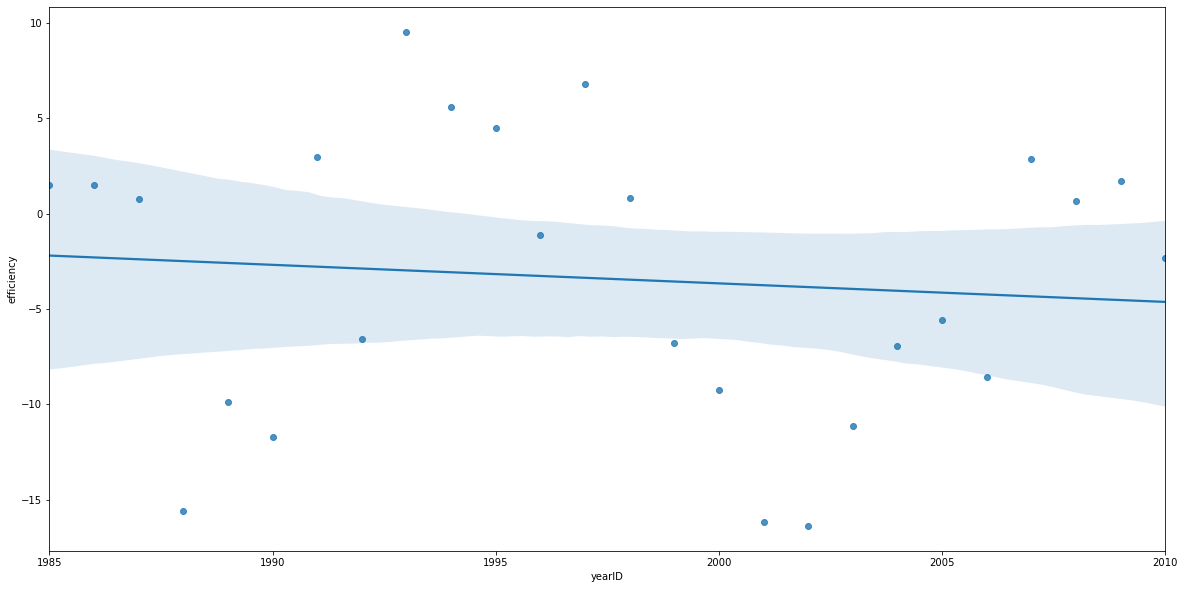

In [19]:
#calculating efficiency
teams_merged_std["efficiency"]= teams_merged_std["exp_win_perct"]-teams_merged_std["win_percent"]


#extracting data for Oakland Athletics
Oakland_Athletics = teams_merged_std.loc[teams_merged_std['name'] == 'Oakland Athletics']

#plotting the efficiency for Oakland Athletics over the years
plt.figure(figsize=(20, 10))
period_regplot =sns.regplot(data=Oakland_Athletics,x="yearID",y="efficiency")

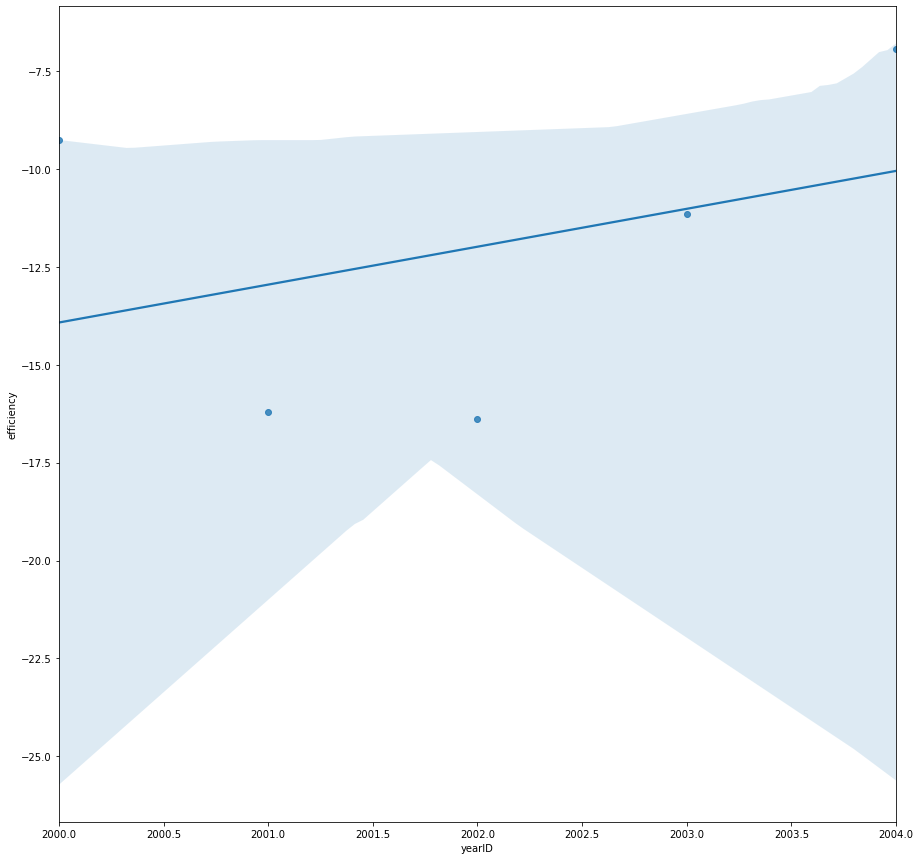

In [20]:
Oakland_Athletics_moneyball = teams_merged_std.loc[(teams_merged_std['name'] == 'Oakland Athletics') & (teams_merged_std['yearID'] >= 2000) & (teams_merged_std['yearID'] <= 2004)]
#plotting the efficiency of Oakland Athletics in the moneyball era
plt.figure(figsize=(15, 15))
period_regplot =sns.regplot(data=Oakland_Athletics_moneyball,x="yearID",y="efficiency")

In [21]:
#showing that Oakland Athletics was one of the top teams in moneyball era
moneyball = teams_merged_std.loc[(teams_merged_std['yearID'] >= 2000) & (teams_merged_std['yearID'] <= 2004)]
moneyball = moneyball.drop(columns =["teamID","payrollMean","payrollSTD","payroll_standardized","exp_win_perct"])
moneyball.sort_values("win_percent",ascending = False).head(10)

,yearID,name,win_percent,Total Payroll,efficiency
448,2001,Seattle Mariners,71.60,74720834.00,-20.65
557,2004,St. Louis Cardinals,64.80,83228333.00,-13.72
476,2002,New York Yankees,64.00,125928583.00,-8.08
477,2002,Oakland Athletics,63.60,40004167.00,-16.38
447,2001,Oakland Athletics,63.00,33810750.00,-16.19
483,2002,Atlanta Braves,62.70,92870367.00,-10.13
536,2004,New York Yankees,62.30,184193950.00,-3.53
513,2003,Atlanta Braves,62.30,106243667.00,-9.15
526,2003,San Francisco Giants,62.10,82852167.00,-11.04
506,2003,New York Yankees,62.00,152749814.00,-4.70


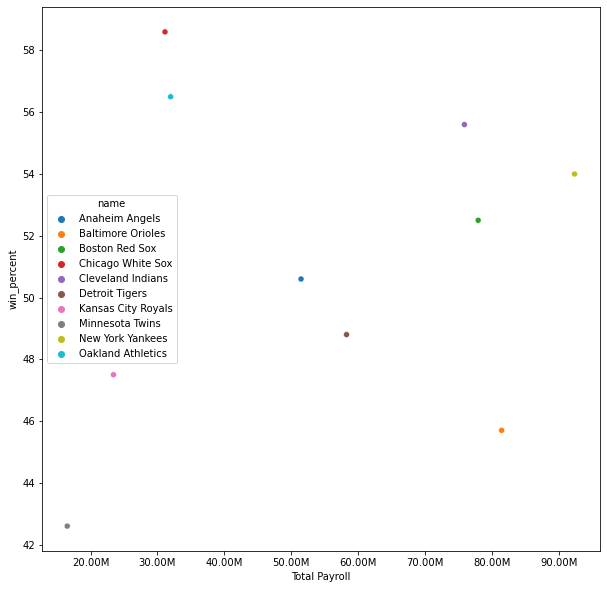

In [22]:
#showing that Oakland Athletics was a high winning team despite relativevly low spending
plt.figure(figsize=(10, 10))
moneyball_scatterplot =sns.scatterplot(data=moneyball.head(10),x="Total Payroll",y="win_percent",hue="name") 
moneyball_scatterplot.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))